In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

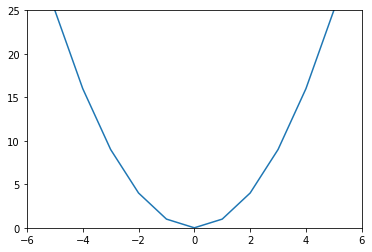

In [18]:
#Passes vertical line test: f(x) = x**2
fig, ax = plt.subplots()
x_vals = list(range(-5,6))
y_vals = [x**2 for x in x_vals]
plt.plot(x_vals, y_vals)
ax.set_xlim([-6,6])
ax.set_ylim([0,25])
plt.show()

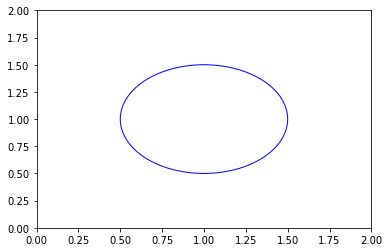

In [9]:
#Fails vertical line test:
fig, ax = plt.subplots()
circle = plt.Circle((1, 1), 0.5, color='b', fill=False)
ax.add_artist(circle)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"


A function is a mapping from a set of inputs to a set of outputs where no input is  is mapped to mulitple outputs- graphs that dont pass the vertical line test have inputs that map to more than one output.



# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 1 is NOT a function because it has muliple y values for x=1, thus failing the vertical line test

Relation 2 is  a function because it passes vertical line test (each input maps to only one output)

Relation 3 is NOT a function because it has muliple y values for x=9, thus failing the vertical line test

Relation 4 is NOT a function because it has muliple y values for x=6 thus failing the vertical line test

Relation 5 is NOT a function because it has muliple y values for x=2 thus failing the vertical line test


# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For the first m function, the dimensionality of the domain is 3, and the codomain is also 3.

For the n function, the domain has 4 dimensions, the codomain has 2 dimensions.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

f(x) = (x, x^2, x^3) 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
#unit vectors for p are x1[1, 0] and x2[0, 1]:

#p([1, 0]) = [1, -1]
#p([0, 1]) = [3, 2]

p_transformation_matrix = np.matrix('1 3; -1 2')

In [0]:
#unit vectors for 1 are x1[1, 0, 0], x2[0,1,0], x3[0,0,1]

#q([1, 0, 0]) = [4, -1, 5]
#q([0, 1, 0]) = [1, 2, 1]
#q([0, 0, 1]) = [2, 3, -2]

q_transformation_matrix = np.matrix('4 1 2; -1 2 3; 5 1 -2')

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [30]:
#test by hand for p[2, 1]: = [2 + 3, 2 - 2] = [5, 0]

#test using dot product of transformation matrix:

p = np.matrix('2; 1')
np.dot(p_transformation_matrix, p)

matrix([[5],
        [0]])

In [31]:
#test by hand for q[1, 2, 3]: [4 + 2 + 6, 4 - 1 + 9, 5 - 6 + 2] = [12, 12, 1]

#test using dot product of transformation matrix:

q = np.matrix('1; 2; 3')  
np.dot(q_transformation_matrix, q)

matrix([[12],
        [12],
        [ 1]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectros that dont change orientation during a transformation, such as the earths axis as earth rotates. These vectors still point in same direction essetially, before and after the transformation. They can change in magnitude? (such as length?) if for example the earth was squished flat into a pancake along the equator, the axis is the eignevector, still points from north to south pole, however its scale has been squished to a smaller value. That change in its scale is the eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

As the number of parameters or dimensions of a model increase, the volume of total space increases exponentially (example from lecture was theincreased difficulty of searching for a penny along a line, then along a square with sides the length of the line, and then amongst a cube of same dimensions for edges). The amount of available data for all of the different parameters becomes spares, which can result in failure of statistical significance 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The rule of thumb is to have 5 times as many observations for every parameter in your model. If its practical to have parameters^2 number of observations, great, if not, 5x is a good rule of thumb

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [35]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
# define a matrix
X = df.iloc[:,:4].values

#Scale/standardize features to mean 0 and variance 1
x = StandardScaler().fit_transform(X)

# create the PCA instance
pca = PCA(2)

#fit the data and reduce to 2 dimensions:
principal_components = pca.fit_transform(x)

#convert to pandas df:
component_df = pd.DataFrame(data = principal_components, columns = ['component_1', 'component_2'])

#merge with target column:
combined = pd.concat([component_df, df.species], axis=1)
combined.head()


,component_1,component_2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


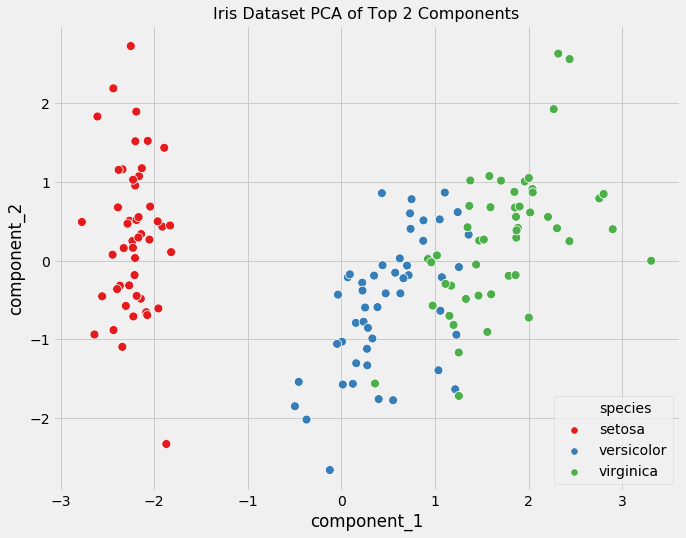

In [74]:
plt.style.use('fivethirtyeight')
fig = fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Iris Dataset PCA of Top 2 Components', fontsize = 16)
colors = sns.color_palette("Set1", n_colors=3)
ax = sns.scatterplot(x=combined.component_1, y=combined.component_2, hue=combined.species, palette=colors, s = 80)
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)